# Task# 2 To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.  
- Data can be found at http://bit.ly/w-data  
###  **Question: What will be predicted score if a student study for 9.25 hrs in a day?**

**There are two types of supervised machine learning algorithms:**  
**1.Regression** : Predicts continuous value outputs.  
         - For instance, predicting the price of a house in dollars is a regression problem  
**2.classification** : Predicts discrete outputs.  
        - predicting whether a tumor is malignant or benign is a classification problem.

  
- **Linear regression** performs the task to predict a dependent variable value (y) based on a given independent variable (x). 

## Index
1. Importing Libraries And Data  
2. Exploring the Data  
3. Preparing the data  
4. Training the Algorithm  
5. Predicting the value on Test set 
6. Visualize comparison of result   
7. Result  
8. Making Predictions For Given Question 
9. Answer

## 1. Importing Libraries And Data

In [19]:
# Import Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn as seabornInstance 
from sklearn import metrics
%matplotlib inline

In [20]:
# Reading data from remote link
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


## 2. Exploring the Data

In [21]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
data.shape

(25, 2)

In [23]:
# The statistical details of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


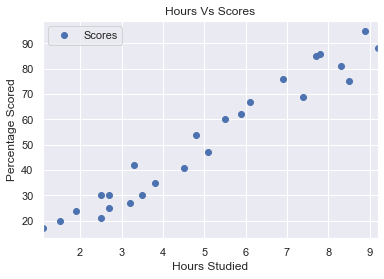

In [24]:
# Ploting the data to  find any relationship between the data
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

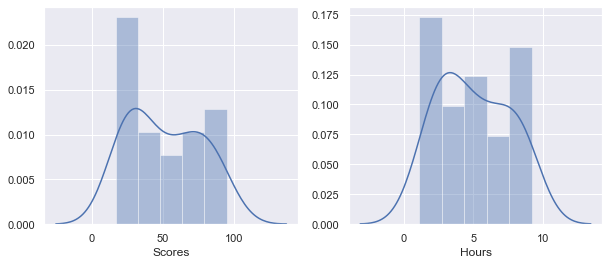

In [25]:
seabornInstance.set(rc={"figure.figsize": (10, 4)})
figure,axes=plt.subplots(1,2)
seabornInstance.distplot(data['Scores'], bins=5,ax=axes[0])

seabornInstance.distplot(data['Hours'], bins=5,ax=axes[1])


## 3. Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
Attributes are the independent variables(Hours) while labels are dependent variables(Score) whose values are to be predicted. 

In [26]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [27]:
# we split 80% of the data to the training set while 20% of the data to test set using below code.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

## 4. Training the Algorithm

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

#Train the model using the training sets
regressor.fit(X_train, y_train)


LinearRegression()

 - To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset

In [29]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


2.0181600414346974
[9.91065648]


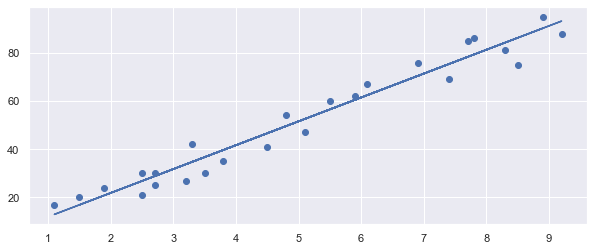

In [30]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## 5. Predicting the value on Test set

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## 6. Visualize comparison of result 

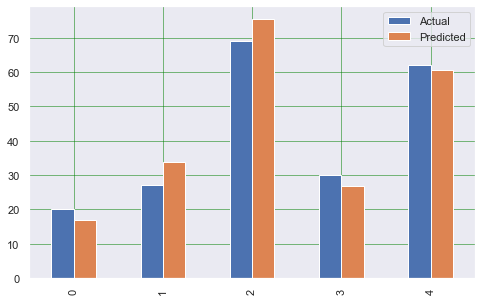

In [33]:
# visualize comparison result as a bar graph using the below script
df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

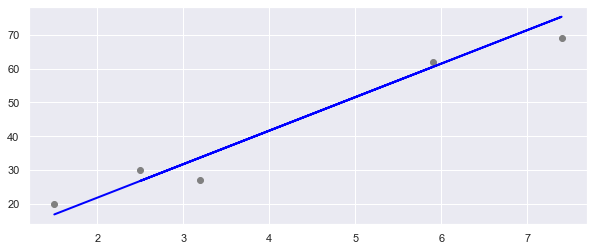

In [34]:
# plot our straight line with the test data :
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

## 7. Result
The final step is to evaluate the performance of the algorithm.

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


## 8. Making Predictions For Given Question
- For Hours = '9.5', Score = ?
  

In [36]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


## 9. Answer

### Predicted score is 93.69 if a student study for 9.25 hrs in a day